#### Objective
Acquire 1000 cash-back credit cards
1. Teams: Data, Marketing, Risk, Product 
2. List generation: inclusions and exclusions 
3. Contact eligibility: business (targeting) and compliance (regulations) 
4. Strategy: offer right **product** to right **customer** through right **channel** 
7. Segmentation based on demographic/financial/behavior attributes: **age**, gender, **marital status**, **occupation**, time at employer, job type, **income**, **checking/savings account reference**, **residential** status, time at address, province, credit score 
8. Treatment: email, direct mail, call center, digital banner ads 
9. A/B testing: sow a random seed to randomly separate a list into control/test groups, treat them with A/B strategies, then measure which strategy is more effective 

In [1]:
# Import necessary libraries
import pandas as pd
import os
import re

In [2]:
# Assign eahc dataset to variable
cust = pd.read_csv('data/cust.csv')
cust_contact_info = pd.read_csv('data/cust_contact_info.csv')
acct = pd.read_csv('data/acct.csv')
tran = pd.read_csv('data/tran.csv')

#### Exploratory Data Analysis

In [3]:
# Summary Function to give statistics for each column in df 
def column_statistics(df):
  stats = {}
  for col in df.columns:
    stats[col] = {
        'Count': df[col].count(),
        'Null': df[col].isnull().sum(),
        'Distinct': df[col].nunique(),
        'Unique': len(df[col].unique())
    }
  print("Column Statistics:")
  print("{:<20} {:>10} {:>10} {:>10} {:>10}".format('Column', 'Count', 'Null', 'Distinct', 'Unique'))
  print("-" * 64)
  for col, values in stats.items():
    print("{:<20} {:>10} {:>10} {:>10} {:>10}".format(col, values['Count'], values['Null'], values['Distinct'], values['Unique']))

In [4]:
# Use the column statistics function to review customers
column_statistics(cust)

Column Statistics:
Column                    Count       Null   Distinct     Unique
----------------------------------------------------------------
gender                    39515          0          3          3
workActivity              39515          0          2          2
occupationIndustry        34405       5110        243        244
totalIncome               39515          0       4900       4900
relationshipStatus        39515          0          5          5
habitationStatus          32634       6881          3          4
schoolAttendance          11074      28441          5          6
schools                    2737      36778          1          2
age                       39515          0         54         54
cust_id_new               39515          0      39515      39515
em_elig                   39515          0          2          2
dm_elig                   39515          0          2          2
lang                      39515          0          2          2


In [5]:
# View slice of the dataset of customers
cust.head()

,gender,workActivity,occupationIndustry,totalIncome,relationshipStatus,habitationStatus,schoolAttendance,schools,age,cust_id_new,em_elig,dm_elig,lang
0,Male,fulltime,NaN,400000.0,Single,Group,NaN,NaN,36,100001,Y,Y,E
1,Female,fulltime,5221 Depository credit intermediation,40009.2,Married,With Spouse,NaN,NaN,44,100002,Y,Y,E
2,Female,fulltime,NaN,400000.0,Single,With Parent,Secondary,1.0,28,100003,Y,Y,F
3,Other,fulltime,"5412 Accounting, tax preparation, bookkeeping ...",44709.0,Married,With Spouse,NaN,NaN,38,100004,N,Y,E
4,Male,fulltime,4855 Charter bus industry,421496.0,Single,With Parent,NaN,NaN,38,100005,Y,N,E


In [6]:
# Drop unnecessary fields that don't indicate real information
cust = cust.drop(['habitationStatus', 'schoolAttendance', 'schools'], axis=1)
cust.columns

Index(['gender', 'workActivity', 'occupationIndustry', 'totalIncome',
       'relationshipStatus', 'age', 'cust_id_new', 'em_elig', 'dm_elig',
       'lang'],
      dtype='object')

In [7]:
# Rename the variables to be more interpretable
cust.rename(columns={
    'workActivity': 'job type',
    'occupationIndustry': 'occupation',
    'totalIncome': 'income',
    'relationshipStatus': 'martial status',
    'cust_id_new': 'customer id',
    'em_elig': 'em eligible',
    'dm_elig': 'dm eligible'
}, inplace=True)

In [8]:
# View the names of columns 
cust.columns

Index(['gender', 'job type', 'occupation', 'income', 'martial status', 'age',
       'customer id', 'em eligible', 'dm eligible', 'lang'],
      dtype='object')

In [9]:
# Typecast each of the variables
# First lets look to current each variable type
cust.dtypes

gender             object
job type           object
occupation         object
income            float64
martial status     object
age                 int64
customer id         int64
em eligible        object
dm eligible        object
lang               object
dtype: object

In [10]:
# Invoke column_statistics function 
# We can see some cols has few unique values and other should be string
column_statistics(cust)

Column Statistics:
Column                    Count       Null   Distinct     Unique
----------------------------------------------------------------
gender                    39515          0          3          3
job type                  39515          0          2          2
occupation                34405       5110        243        244
income                    39515          0       4900       4900
martial status            39515          0          5          5
age                       39515          0         54         54
customer id               39515          0      39515      39515
em eligible               39515          0          2          2
dm eligible               39515          0          2          2
lang                      39515          0          2          2


In [11]:
# Change cols to category type
categories = ['gender', 'job type', 'occupation', 'lang']
for col in categories:
    cust[col] = cust[col].astype('category')

# Change cols to boolean type
boolean = ['em eligible', 'dm eligible']
for col in boolean:
    cust[col] = cust[col].map({"Y": True, "N": False})

# Channge to str type
cust['customer id'] = cust['customer id'].astype(str)

# Show change
cust.dtypes

gender            category
job type          category
occupation        category
income             float64
martial status      object
age                  int64
customer id         object
em eligible           bool
dm eligible           bool
lang              category
dtype: object

In [12]:
# Review the column statistics of the customer's contact information
column_statistics(cust_contact_info)

Column Statistics:
Column                    Count       Null   Distinct     Unique
----------------------------------------------------------------
email_addr                39515          0      30000      30000
first_name                39515          0        992        992
last_name                 39515          0       1000       1000
cust_id_new               39515          0      39515      39515
addr_line1                39515          0       1000       1000
addr_line2                39515          0        773        773
postal_cd                 39515          0       1000       1000
city                      39515          0        993        993
country                   39515          0          1          1
prov_cd                   39515          0         13         13


In [13]:
# Drop unnecessary columns from the customer contact information dataset
cust_contact_info.drop(['addr_line1', 'addr_line2', 'country'], axis=1, inplace=True)
cust_contact_info.head()

,email_addr,first_name,last_name,cust_id_new,postal_cd,city,prov_cd
0,Stevan_Zink21@gmail.com,Stevan,Zink,100001,L8H 1S6,North Rodolfoside,PE
1,Francisco.Zink77@hotmail.com,Francisco,Zink,100002,T6O 3G4,Port Merlin,ON
2,Rosslyn_Zink@yahoo.com,Rosslyn,Zink,100003,V1J 5I8,Port Jeffereyfort,NT
3,Leighanna_Zink21@gmail.com,Leighanna,Zink,100004,R0O 2U1,South Laura,NB
4,Emery.Zink77@hotmail.com,Emery,Zink,100005,P4G 6O0,Jaymehaven,NU


In [14]:
# Renaming the columns to be more readable
cust_contact_info.rename(columns={
    'email_addr': 'email',
    'first_name': 'first',
    'last_name': 'last',
    'cust_id_new': 'customer id',
    'postal_cd': 'postal',
    'prov_cd': 'province'
}, inplace=True)

# Show the new names for the columns
cust_contact_info.columns

Index(['email', 'first', 'last', 'customer id', 'postal', 'city', 'province'], dtype='object')

In [15]:
# Type cast for the customer contact information
# First look at the current type
cust_contact_info.dtypes

email          object
first          object
last           object
customer id     int64
postal         object
city           object
province       object
dtype: object

In [16]:
# Review the df again to choose the right type for each col
column_statistics(cust_contact_info)

Column Statistics:
Column                    Count       Null   Distinct     Unique
----------------------------------------------------------------
email                     39515          0      30000      30000
first                     39515          0        992        992
last                      39515          0       1000       1000
customer id               39515          0      39515      39515
postal                    39515          0       1000       1000
city                      39515          0        993        993
province                  39515          0         13         13


In [17]:
# Change to category and str type
cust_contact_info = cust_contact_info.astype({
    "city": "category",
    "province": "category",
    "customer id": str
})

# Show the changing
cust_contact_info.dtypes

email            object
first            object
last             object
customer id      object
postal           object
city           category
province       category
dtype: object

In [18]:
# Review the column statistics of the accounts dataset
column_statistics(acct)

Column Statistics:
Column                    Count       Null   Distinct     Unique
----------------------------------------------------------------
branchNumber              79030          0        175        175
type                      79030          0          2          2
openDate                  79030          0          1          1
balance                   79030          0      10804      10804
currency                  79030          0          1          1
cust_id_new               79030          0      39515      39515
acct_id                   79030          0      79030      79030


In [19]:
# Drop unnecessary columns from the account dataset
# The openDate col has one unique value so we decide to remove it
acct.drop(['branchNumber', 'openDate', 'currency'], axis=1, inplace=True)
acct

,type,balance,cust_id_new,acct_id
0,DDA,4947.73,104344,10000001
1,SDA,10208.64,104344,10000002
2,SDA,8834.72,102382,10000003
3,DDA,12542.26,102382,10000004
4,SDA,4625.30,102780,10000005
...,...,...,...,...
79025,DDA,36665.98,163764,16011286
79026,SDA,21388.80,162445,16011287
79027,DDA,23798.14,162445,16011288
79028,SDA,11451.20,160042,16011289


In [20]:
# Renaming the account variables in the dataset
acct.rename(columns={
    'type': 'account type',
    'cust_id_new': 'customer id',
    'acct_id': 'account id'
}, inplace=True)

# New names
acct.columns

Index(['account type', 'balance', 'customer id', 'account id'], dtype='object')

In [21]:
# Type cast the accounts dataset
# Current type
acct.dtypes

account type     object
balance         float64
customer id       int64
account id        int64
dtype: object

In [22]:
# Choose the suitable type
column_statistics(acct)

Column Statistics:
Column                    Count       Null   Distinct     Unique
----------------------------------------------------------------
account type              79030          0          2          2
balance                   79030          0      10804      10804
customer id               79030          0      39515      39515
account id                79030          0      79030      79030


In [23]:
# Change to category and str
acct = acct.astype({
    "account type": 'category',
    "customer id": str,
    "account id": str
})

# New names
acct.dtypes

account type    category
balance          float64
customer id       object
account id        object
dtype: object

In [24]:
# Review the column statistics of the transaction dataset
column_statistics(tran)

Column Statistics:
Column                    Count       Null   Distinct     Unique
----------------------------------------------------------------
description               92304          0      56326      56326
currencyAmount            92304          0      26479      26479
locationRegion                0      92304          0          1
locationCity                  0      92304          0          1
originationDateTime       92304          0      12776      12776
merchantId                43298      49006        738        739
categoryTags              92173        131         14         15
cust_id_new               92304          0      39516      39516
acct_id                   92304          0      56496      56496


In [25]:
# Select only the most relevant variables necessary - an alternative for removing unnecessary columns
tran = tran[['cust_id_new', 'acct_id', 'currencyAmount', 'categoryTags', 'originationDateTime']].copy()
tran.head()

,cust_id_new,acct_id,currencyAmount,categoryTags,originationDateTime
0,100001,1000001,1092.22,Income,20180628T000000+0000
1,100002,1000002,701.11,Income,20180628T000000+0000
2,100003,1000003,111.98,Bills and Utilities,20180430T000000+0000
3,100004,1000004,1.16,Food and Dining,20181009T153000+0000
4,100005,1000005,41.00,Transfer,20180705T000000+0000


In [26]:
# Rename all of the columns to be a bit more interpretable for the transactions table
tran.rename(columns={
    'cust_id_new': 'customer id',
    'acct_id': 'account id',
    'currencyAmount': 'amount',
    'categoryTags': 'category',
    'originationDateTime': 'transaction datetime'
}, inplace=True)

# New names
tran.columns

Index(['customer id', 'account id', 'amount', 'category',
       'transaction datetime'],
      dtype='object')

In [27]:
# Type cast the transactions columns
tran.dtypes

customer id               int64
account id                int64
amount                  float64
category                 object
transaction datetime     object
dtype: object

In [28]:
# Review df
column_statistics(tran)

Column Statistics:
Column                    Count       Null   Distinct     Unique
----------------------------------------------------------------
customer id               92304          0      39516      39516
account id                92304          0      56496      56496
amount                    92304          0      26479      26479
category                  92173        131         14         15
transaction datetime      92304          0      12776      12776


In [29]:
# Change types 
tran = tran.astype({
    'customer id': str,
    'account id': str,
    'category': 'category',
})

# New data types
tran.dtypes

customer id               object
account id                object
amount                   float64
category                category
transaction datetime      object
dtype: object

In [30]:
# For the dates, we will handle them separately using the pandas datetime objects
tran['transaction datetime'] = pd.to_datetime(tran['transaction datetime'], format="%Y%m%dT%H%M%S%z")

# New date types
tran.dtypes

customer id                          object
account id                           object
amount                              float64
category                           category
transaction datetime    datetime64[ns, UTC]
dtype: object

#### Data Issues

In [31]:
# If we look again at the acct and tran tables, we find that both tables have 'customer id' and 'account id' columns.
# But is there a connection between the key combinations in these tables?
acct_keys = acct[['customer id', 'account id']].drop_duplicates()
tran_keys = tran[['customer id', 'account id']].drop_duplicates()
merged = pd.merge(acct_keys, tran_keys, on=['customer id', 'account id'], how='inner')
if merged.empty:
    print("No common (customer id, account id) pairs found between acct and tran.")
else:
    print("Some (customer id, account id) pairs exist in both tables.")


No common (customer id, account id) pairs found between acct and tran.


#### List Generation: inclusions and exclusions

In [32]:
# inclusions: customers aged between 25 and 55 with income greater than 40000
# Observe the number of customers in the list
cust2 = cust[(cust['age'].isin(range(25, 56))) & (cust['income'] > 40000)]
cust2.shape[0]

26488

In [33]:
# inclusions: customers having DDA account(s) with balance greater than 5000
# Observe the number of accounts in the list
acct2 = acct[(acct['account type'] == 'DDA') & (acct['balance'] > 5000)]
acct2 = acct2[["customer id"]]
len(acct2)

32214

In [34]:
# inclusions: customers having transactions in 'Food and Dining'
# Observe the number of customers in the transaction list
tran2 = tran[tran['category'] == 'Food and Dining'].groupby('customer id').size().reset_index(name='No. transactions')
tran2 = tran2[["customer id"]]
len(tran2)

19018

In [35]:
# Build out the customer list in steps
# With the contact infomrmation, make the first inclusion of customers based on the 
# first criteria - Age and Income
# cust2 inner join cust_contact_info on customer id

cust3 = pd.merge(cust2, cust_contact_info, how="inner", on="customer id")
print(cust3.shape)
cust3.head()

(26488, 16)


,gender,job type,occupation,income,martial status,age,customer id,em eligible,dm eligible,lang,email,first,last,postal,city,province
0,Male,fulltime,NaN,400000.0,Single,36,100001,True,True,E,Stevan_Zink21@gmail.com,Stevan,Zink,L8H 1S6,North Rodolfoside,PE
1,Female,fulltime,5221 Depository credit intermediation,40009.2,Married,44,100002,True,True,E,Francisco.Zink77@hotmail.com,Francisco,Zink,T6O 3G4,Port Merlin,ON
2,Female,fulltime,NaN,400000.0,Single,28,100003,True,True,F,Rosslyn_Zink@yahoo.com,Rosslyn,Zink,V1J 5I8,Port Jeffereyfort,NT
3,Other,fulltime,"5412 Accounting, tax preparation, bookkeeping ...",44709.0,Married,38,100004,False,True,E,Leighanna_Zink21@gmail.com,Leighanna,Zink,R0O 2U1,South Laura,NB
4,Male,fulltime,4855 Charter bus industry,421496.0,Single,38,100005,True,False,E,Emery.Zink77@hotmail.com,Emery,Zink,P4G 6O0,Jaymehaven,NU


In [36]:
# Rearrnge the columns in df
cols = ['customer id', 'gender', 'first', 'last', 'age', 'job type', 'occupation', 'martial status',
        'email', 'postal', 'province', 'city', 'income', 'em eligible', 'dm eligible', 'lang']

cust3 = cust3[cols]
print(cust3.shape)
cust3.head()

(26488, 16)


,customer id,gender,first,last,age,job type,occupation,martial status,email,postal,province,city,income,em eligible,dm eligible,lang
0,100001,Male,Stevan,Zink,36,fulltime,NaN,Single,Stevan_Zink21@gmail.com,L8H 1S6,PE,North Rodolfoside,400000.0,True,True,E
1,100002,Female,Francisco,Zink,44,fulltime,5221 Depository credit intermediation,Married,Francisco.Zink77@hotmail.com,T6O 3G4,ON,Port Merlin,40009.2,True,True,E
2,100003,Female,Rosslyn,Zink,28,fulltime,NaN,Single,Rosslyn_Zink@yahoo.com,V1J 5I8,NT,Port Jeffereyfort,400000.0,True,True,F
3,100004,Other,Leighanna,Zink,38,fulltime,"5412 Accounting, tax preparation, bookkeeping ...",Married,Leighanna_Zink21@gmail.com,R0O 2U1,NB,South Laura,44709.0,False,True,E
4,100005,Male,Emery,Zink,38,fulltime,4855 Charter bus industry,Single,Emery.Zink77@hotmail.com,P4G 6O0,NU,Jaymehaven,421496.0,True,False,E


In [37]:
# With the contact infomrmation, make the second inclusion of customers based on the 
# second criteria - Account type and Balance
# cust3 inner join acct1 on customer id
cust4 = pd.merge(cust3, acct2, on='customer id', how="inner")
print(cust4.shape)
cust4.head()

(20986, 16)


,customer id,gender,first,last,age,job type,occupation,martial status,email,postal,province,city,income,em eligible,dm eligible,lang
0,100002,Female,Francisco,Zink,44,fulltime,5221 Depository credit intermediation,Married,Francisco.Zink77@hotmail.com,T6O 3G4,ON,Port Merlin,40009.20,True,True,E
1,100004,Other,Leighanna,Zink,38,fulltime,"5412 Accounting, tax preparation, bookkeeping ...",Married,Leighanna_Zink21@gmail.com,R0O 2U1,NB,South Laura,44709.00,False,True,E
2,100005,Male,Emery,Zink,38,fulltime,4855 Charter bus industry,Single,Emery.Zink77@hotmail.com,P4G 6O0,NU,Jaymehaven,421496.00,True,False,E
3,100008,Male,Justyn,Zink,47,fulltime,8111 Automotive repair and maintenance,Single,Justyn.Zink77@hotmail.com,B2O 8K1,ON,North Mckennaside,136281.20,False,True,E
4,100009,Male,Bethany,Zink,28,fulltime,"5419 Other professional, scientific and techni...",Single,Bethany_Zink@yahoo.com,M8Y 6J7,QC,Alvertafurt,423638.89,True,True,F


In [38]:
# With the contact infomrmation, make the third inclusion of customers based on the 
# third criteria - Transaction type
# cust4 inner join tran1 on customer id
cust5 = pd.merge(cust4, tran2, on="customer id")
print(cust5.shape)
cust5.head()

(10049, 16)


,customer id,gender,first,last,age,job type,occupation,martial status,email,postal,province,city,income,em eligible,dm eligible,lang
0,100004,Other,Leighanna,Zink,38,fulltime,"5412 Accounting, tax preparation, bookkeeping ...",Married,Leighanna_Zink21@gmail.com,R0O 2U1,NB,South Laura,44709.00,False,True,E
1,100005,Male,Emery,Zink,38,fulltime,4855 Charter bus industry,Single,Emery.Zink77@hotmail.com,P4G 6O0,NU,Jaymehaven,421496.00,True,False,E
2,100020,Female,Jewell,Zeller,43,fulltime,6111 Elementary and secondary schools,Married,Jewell.Zeller77@hotmail.com,C9Y 6Q6,NB,Ratketown,431453.00,False,False,E
3,100021,Male,Chanse,Zelaya,29,parttime,"5412 Accounting, tax preparation, bookkeeping ...",Single,Chanse_Zelaya@yahoo.com,L0S 4R5,NL,New Alizaland,415948.57,True,True,F
4,100023,Male,Riddhi,Zelaya,42,parttime,6230 Nursing and residential care facilities (...,Married,Riddhi.Zelaya77@hotmail.com,L5G 8Y2,MB,Manleyside,419541.00,True,True,E


In [39]:
#Exclusion - ensuring that the emails are valid for the final output
# Define a regex pattern for a valid email address
email_pattern = re.compile(r'^[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}$')

# Apply the regex pattern to filter valid emails in the dataset
cust5['valid_email'] = cust5['email'].apply(lambda x: bool(email_pattern.match(x)))

# Filter the dataframe to include only rows with valid emails
cust5 = cust5[cust5['valid_email'] == True]

# Drop the temporary 'valid_email' column if not needed anymore
cust5 = cust5.drop(columns=['valid_email'])
cust5.shape

(10049, 16)

#### Segmentation
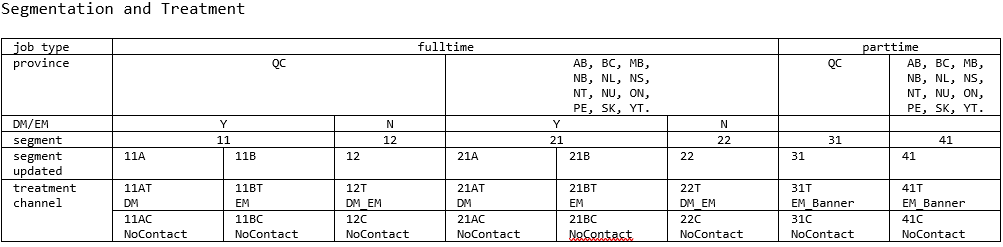

In [40]:
# Based on the segmentation and groups defined in the picture above, we want to create a new variable defined as segment
# with corresponding values 11, 12, 21, 22, 31, and 41. 
# Use a for loop to traverse the final output table of the customer contact info.
# You will review the job type, the email and direct mail eligibility as well as the geographic location.

for index, row in cust5.iterrows():
    if row['job type'] == "fulltime":
        if row['province'] == "QC":
            if row['em eligible'] and row['dm eligible']:
                segment = '11'
            else:
                segment = '12'
        else:
            if row['em eligible'] and row['dm eligible']:
                segment = '21'
            else:
                segment = '22'
    else:
        if row['province'] == "QC":
            segment = '31'
        else:
            segment = '41'

    cust5.at[index, 'segment'] = segment

cust5.head()

,customer id,gender,first,last,age,job type,occupation,martial status,email,postal,province,city,income,em eligible,dm eligible,lang,segment
0,100004,Other,Leighanna,Zink,38,fulltime,"5412 Accounting, tax preparation, bookkeeping ...",Married,Leighanna_Zink21@gmail.com,R0O 2U1,NB,South Laura,44709.00,False,True,E,22
1,100005,Male,Emery,Zink,38,fulltime,4855 Charter bus industry,Single,Emery.Zink77@hotmail.com,P4G 6O0,NU,Jaymehaven,421496.00,True,False,E,22
2,100020,Female,Jewell,Zeller,43,fulltime,6111 Elementary and secondary schools,Married,Jewell.Zeller77@hotmail.com,C9Y 6Q6,NB,Ratketown,431453.00,False,False,E,22
3,100021,Male,Chanse,Zelaya,29,parttime,"5412 Accounting, tax preparation, bookkeeping ...",Single,Chanse_Zelaya@yahoo.com,L0S 4R5,NL,New Alizaland,415948.57,True,True,F,41
4,100023,Male,Riddhi,Zelaya,42,parttime,6230 Nursing and residential care facilities (...,Married,Riddhi.Zelaya77@hotmail.com,L5G 8Y2,MB,Manleyside,419541.00,True,True,E,41


In [41]:
# Using the new segment created, create a frequency table (ie count the people in each of the segments defined)
cust5['segment'].value_counts().sort_index()

segment
11     137
12     109
21    2839
22    2914
31     172
41    3878
Name: count, dtype: int64

#### A/B Testing: 50-50 split
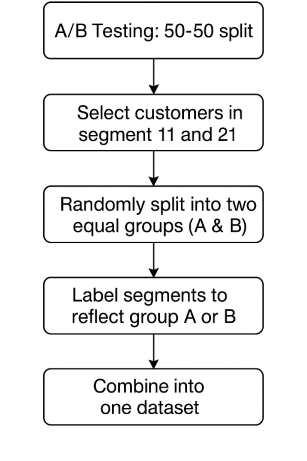

In [42]:
# Based on segment 11 and 21, we are going to create an AB test with a 50/50 split
# Here, we simply sort the customers and then create a subset of the data as a new variable
AB = cust5[["customer id", "segment"]][cust5['segment'].isin(["11", "21"])].sort_values("customer id")
AB['segment'].value_counts().sort_index()

segment
11     137
21    2839
Name: count, dtype: int64

In [43]:
# From the table, we'll create the separate datasets by defining A as group A with a 50% sample and a random seed
A = AB.sample(frac=0.5, random_state=50)
# we'll define B as everyone else by dropping the indexes in B
B = AB.drop(A.index)

In [44]:
# We are going to redefine the segments by appending 
# the letter of each group to the end of each of the segments to avoid biasing the dataset
A["segment"] = A["segment"].apply(lambda x: x + "A")
B["segment"] = B["segment"].apply(lambda x: x + "B")

In [45]:
# We will now recreate the dataset by appending the new A and B datasets to redefine AB using pandas
AB = pd.concat([A, B], ignore_index=True)
AB

,customer id,segment
0,150444,21A
1,100157,21A
2,100702,21A
3,101767,21A
4,151384,21A
...,...,...
2971,165537,21B
2972,165564,21B
2973,165568,21B
2974,165604,21B


In [46]:
# We merge the information back to the original dataset to enrich the original customer 5 dataset
# Then we enrich the dataset by overwriting the new segment value with the A and B Suffix
# Followed by dropping the variables we don't need. We can use pandas native functions for this
# asepect
cust6 = pd.merge(cust5, AB, on='customer id', how="left")
cust6["segment"] = cust6.apply(lambda row: row["segment_y"] if pd.notnull(row["segment_y"]) else row["segment_x"], axis=1)

# validate the operation we di
display(cust6[["segment_x", "segment_y", "segment"]].iloc[7:9])
cust6.drop(["segment_x", "segment_y"], axis=1, inplace=True)
cust6.columns

,segment_x,segment_y,segment
7,22,NaN,22
8,21,21B,21B


Index(['customer id', 'gender', 'first', 'last', 'age', 'job type',
       'occupation', 'martial status', 'email', 'postal', 'province', 'city',
       'income', 'em eligible', 'dm eligible', 'lang', 'segment'],
      dtype='object')

In [47]:
# We want to review the frequency of the different segments to be able to see how many
# customers fall into the categories and who all are excluded from the AB test
cust6["segment"].value_counts().sort_index()

segment
11A      74
11B      63
12      109
21A    1414
21B    1425
22     2914
31      172
41     3878
Name: count, dtype: int64

#### Test/Control Grouping: 90-10 split

In [48]:
# Based on the AB Tests, we will now create a test and control group based on the AB test
# we will create a 90/10 split using a random value and seed similar to the step above
# From here, we'll label them using a numeric value called 'selected'
# Then we'll rebuild the dataset and review it using the cross tab functionality from pandas
# This way, we can review the end result and how the test and control groups are distributed
TC = cust6[["customer id", "segment"]].sort_values("customer id")
T = TC.sample(frac=0.9, random_state=9010)
C = TC.drop(T.index)

T["selected"] = 1
C["selected"] = 0
TC = pd.concat([T, C], ignore_index=True)
pd.crosstab(TC["segment"], TC["selected"], dropna=False)

selected,0,1
segment,,
11A,8,66
11B,8,55
12,7,102
21A,152,1262
21B,137,1288
22,307,2607
31,10,162
41,376,3502


#### Treatment/Channel Assignment: email, direct mail, call center, digital banner ads
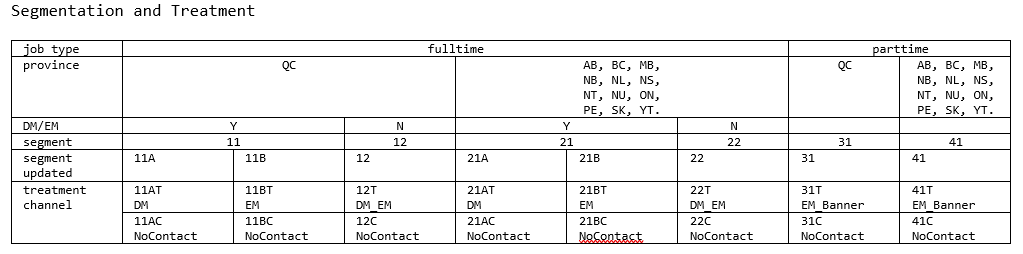

In [49]:
# Following the similar steps to the segmentation of customers,
# you will create a for loop to traverse every row, identify the treatment group 
# and add the T variable for the segments that fall into the categories accordingly
# This way, you can set the channels of outreach for each customer that is in the 
# Test group
for index, row in TC.iterrows():
    if row["selected"] == 1:
        treatment = row["segment"].strip() + "T"
        if row["segment"] in ["11A", "21A"]:
            channel = "DM"
        elif row["segment"] in ["11B", "21B"]:
            channel = "EM"
        elif row["segment"] in ["12", "22"]:
            channel = "DM_EM"
        else:
            channel = "EM_Banner"

    else:
        treatment = row["segment"].strip() + "C"
        channel = "NoContact"

    TC.at[index, 'treatment'] = treatment
    TC.at[index, 'channel'] = channel
    

TC.head()

,customer id,segment,selected,treatment,channel
0,100989,41,1,41T,EM_Banner
1,120442,22,1,22T,DM_EM
2,161228,21A,1,21AT,DM
3,112237,21A,1,21AT,DM
4,141828,41,1,41T,EM_Banner


In [50]:
# Define a groupby of the segment, treatment and channel group 
# to see how many fall into each of the categories from each segment
TC.groupby(['segment', 'treatment', 'channel']).size().reset_index(name='count')

,segment,treatment,channel,count
0,11A,11AC,NoContact,8
1,11A,11AT,DM,66
2,11B,11BC,NoContact,8
3,11B,11BT,EM,55
4,12,12C,NoContact,7
5,12,12T,DM_EM,102
6,21A,21AC,NoContact,152
7,21A,21AT,DM,1262
8,21B,21BC,NoContact,137
9,21B,21BT,EM,1288


In [51]:
# Create the final dataset by inner joining on the TC dataset accordingly 
# and being able to easily reach out to the customers
TC = TC[["customer id", "treatment", "channel"]]
final_cust = pd.merge(cust6, TC, on="customer id")
final_cust.head()

,customer id,gender,first,last,age,job type,occupation,martial status,email,postal,province,city,income,em eligible,dm eligible,lang,segment,treatment,channel
0,100004,Other,Leighanna,Zink,38,fulltime,"5412 Accounting, tax preparation, bookkeeping ...",Married,Leighanna_Zink21@gmail.com,R0O 2U1,NB,South Laura,44709.00,False,True,E,22,22T,DM_EM
1,100005,Male,Emery,Zink,38,fulltime,4855 Charter bus industry,Single,Emery.Zink77@hotmail.com,P4G 6O0,NU,Jaymehaven,421496.00,True,False,E,22,22T,DM_EM
2,100020,Female,Jewell,Zeller,43,fulltime,6111 Elementary and secondary schools,Married,Jewell.Zeller77@hotmail.com,C9Y 6Q6,NB,Ratketown,431453.00,False,False,E,22,22T,DM_EM
3,100021,Male,Chanse,Zelaya,29,parttime,"5412 Accounting, tax preparation, bookkeeping ...",Single,Chanse_Zelaya@yahoo.com,L0S 4R5,NL,New Alizaland,415948.57,True,True,F,41,41T,EM_Banner
4,100023,Male,Riddhi,Zelaya,42,parttime,6230 Nursing and residential care facilities (...,Married,Riddhi.Zelaya77@hotmail.com,L5G 8Y2,MB,Manleyside,419541.00,True,True,E,41,41T,EM_Banner


In [52]:
# Evaluate the distribution in each segment of the channel to determine who will and will not be contacted
# for the test groups
final_cust['channel'].value_counts(dropna=False).sort_index()

channel
DM           1328
DM_EM        2709
EM           1343
EM_Banner    3664
NoContact    1005
Name: count, dtype: int64

In [53]:
# Create output directory if it doesn't exist
# Write the final files denoted as the channel names to a csv file
# You will enumerate the distinct channels, filter the dataset and write it to a csv file

output_dir = 'outputs'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

for channel in final_cust['channel'].unique():
    df_filtered = final_cust[final_cust["channel"] == channel]
    display(df_filtered.head())
    filename = os.path.join(output_dir, f"output_file_{channel}.csv")
    df_filtered.to_csv(filename, index=False)


,customer id,gender,first,last,age,job type,occupation,martial status,email,postal,province,city,income,em eligible,dm eligible,lang,segment,treatment,channel
0,100004,Other,Leighanna,Zink,38,fulltime,"5412 Accounting, tax preparation, bookkeeping ...",Married,Leighanna_Zink21@gmail.com,R0O 2U1,NB,South Laura,44709.0,False,True,E,22,22T,DM_EM
1,100005,Male,Emery,Zink,38,fulltime,4855 Charter bus industry,Single,Emery.Zink77@hotmail.com,P4G 6O0,NU,Jaymehaven,421496.0,True,False,E,22,22T,DM_EM
2,100020,Female,Jewell,Zeller,43,fulltime,6111 Elementary and secondary schools,Married,Jewell.Zeller77@hotmail.com,C9Y 6Q6,NB,Ratketown,431453.0,False,False,E,22,22T,DM_EM
7,100030,Female,Brenna,Zelaya,47,fulltime,Retired,Widowed,Brenna_Zelaya@yahoo.com,N8O 3B9,PE,Port Grant,49325.5,True,False,F,22,22T,DM_EM
10,100035,Male,Katheryne,Zapata,38,fulltime,3364 Aerospace product and parts manufacturing,Separate,Katheryne.Zapata77@hotmail.com,T3B 2J2,MB,Lake Rose,119147.0,True,False,E,22,22T,DM_EM


,customer id,gender,first,last,age,job type,occupation,martial status,email,postal,province,city,income,em eligible,dm eligible,lang,segment,treatment,channel
3,100021,Male,Chanse,Zelaya,29,parttime,"5412 Accounting, tax preparation, bookkeeping ...",Single,Chanse_Zelaya@yahoo.com,L0S 4R5,NL,New Alizaland,415948.57,True,True,F,41,41T,EM_Banner
4,100023,Male,Riddhi,Zelaya,42,parttime,6230 Nursing and residential care facilities (...,Married,Riddhi.Zelaya77@hotmail.com,L5G 8Y2,MB,Manleyside,419541.00,True,True,E,41,41T,EM_Banner
5,100025,Female,Jullian,Zelaya,53,parttime,"4511 Sporting goods, hobby and musical instrum...",Separate,Jullian_Zelaya21@gmail.com,J0Y 9G9,QC,Felipemouth,426302.10,True,False,E,31,31T,EM_Banner
6,100028,Female,Raylon,Zelaya,31,parttime,6113 Universities,Single,Raylon_Zelaya21@gmail.com,G5G 1L6,BC,West Malcolm,403928.98,False,True,E,41,41T,EM_Banner
9,100034,Male,Sydni,Zapata,28,parttime,"5419 Other professional, scientific and techni...",Single,Sydni_Zapata21@gmail.com,C1H 7H0,BC,Dickensshire,404521.66,True,True,E,41,41T,EM_Banner


,customer id,gender,first,last,age,job type,occupation,martial status,email,postal,province,city,income,em eligible,dm eligible,lang,segment,treatment,channel
8,100031,Female,Gilberto,Zapata,41,fulltime,Retired,Single,Gilberto_Zapata21@gmail.com,P6S 7I8,ON,Lake Lindseyfort,431535.7,True,True,E,21B,21BT,EM
17,100053,Male,Ysabella,Zack,35,fulltime,6111 Elementary and secondary schools,Married,Ysabella.Zack77@hotmail.com,H6S 0G4,YT,South Lew,44012.0,True,True,E,21B,21BT,EM
23,100078,Female,Isabela,Youngblood,45,fulltime,Retired,Married,Isabela_Youngblood@yahoo.com,T9Z 1E8,QC,Lake Schuyler,424842.3,True,True,F,11B,11BT,EM
56,100189,Female,Truth,Wolverton,37,fulltime,6220 Hospitals (6221 to 6223),Divorced,Truth_Wolverton@yahoo.com,G1F 8B5,NT,New Catherineport,421187.0,True,True,F,21B,21BT,EM
57,100193,Female,Ozias,Wolfson,50,fulltime,"8139 Business, professional, labour and other ...",Married,Ozias_Wolfson21@gmail.com,Y7U 9R9,NL,New Lyla,159838.8,True,True,E,21B,21BT,EM


,customer id,gender,first,last,age,job type,occupation,martial status,email,postal,province,city,income,em eligible,dm eligible,lang,segment,treatment,channel
15,100049,Female,Marlie,Zamarripa,36,fulltime,4821 Rail transportation,Separate,Marlie_Zamarripa21@gmail.com,R1Q 4K3,PE,West Jevonstad,42802.0,True,True,E,21A,21AT,DM
20,100061,Female,Pietro,Zabala,51,fulltime,6230 Nursing and residential care facilities (...,Divorced,Pietro_Zabala21@gmail.com,N6A 9S7,SK,Destinyfort,81900.5,True,True,E,21A,21AT,DM
27,100091,Female,Kameryn,Yip,42,fulltime,Retired,Married,Kameryn_Yip21@gmail.com,E1D 5J0,NT,Port Leonoraville,427118.7,True,True,E,21A,21AT,DM
28,100093,Female,Yeray,Yip,43,fulltime,5411 Legal services,Married,Yeray_Yip@yahoo.com,X9R 7T9,NT,North Marlonshire,93360.0,True,True,F,21A,21AT,DM
29,100098,Male,Zayd,Yip,53,fulltime,"5413 Architectural, engineering and related se...",Married,Zayd.Yip77@hotmail.com,J5R 1D7,BC,Champlinmouth,73146.9,True,True,E,21A,21AT,DM


,customer id,gender,first,last,age,job type,occupation,martial status,email,postal,province,city,income,em eligible,dm eligible,lang,segment,treatment,channel
16,100051,Female,Tayten,Zack,26,parttime,7139 Other amusement and recreation industries,Single,Tayten_Zack@yahoo.com,E1W 8F6,NB,Port Susannastad,413345.86,True,True,F,41,41C,NoContact
40,100144,Male,Nylah,Worsham,47,parttime,6211 Offices of physicians,Single,Nylah_Worsham@yahoo.com,N7P 1I1,NS,West Dorisbury,421939.50,False,True,F,41,41C,NoContact
47,100162,Female,Grayson,Workman,45,fulltime,5221 Depository credit intermediation,Married,Grayson_Workman@yahoo.com,C8P 3R0,NL,Lake Dannie,51962.90,True,True,F,21A,21AC,NoContact
48,100163,Male,Dezmond,Workman,34,parttime,5414 Specialized design services,Single,Dezmond_Workman21@gmail.com,P3C 4G2,ON,South Kiannatown,409583.53,True,True,E,41,41C,NoContact
72,100230,Male,Mariajose,Witmer,33,parttime,5172 Wireless telecommunications carriers (exc...,Single,Mariajose.Witmer77@hotmail.com,B5O 1G1,NT,West Daisha,406508.92,True,False,E,41,41C,NoContact


In [54]:
# Check shape (rows, columns) for all DataFrames in current session
def check_all_df_shapes():
  print("{:<20} {:>8} {:>12}".format('Object', 'Rows', 'Columns'))
  print("-" * 42)
  all_vars = globals()
  for var_name, obj in all_vars.items():
    if isinstance(obj, pd.DataFrame):
      rows, cols = obj.shape
      print("{:<20} {:>10} {:>10}".format(var_name, rows, cols))
check_all_df_shapes()

Object                   Rows      Columns
------------------------------------------
__                            5         19
___                          16          4
cust                      39515         10
cust_contact_info         39515          7
acct                      79030          4
tran                      92304          5
_5                            5         13
_13                           5          7
_19                       79030          4
_25                           5          5
acct_keys                 79030          2
tran_keys                 92304          2
merged                        0          2
cust2                     26488         10
acct2                     32214          1
tran2                     19018          1
cust3                     26488         16
_35                           5         16
_36                           5         16
cust4                     20986         16
_37                           5         16
cust5      